In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("E:\Technolabs\cleaned_final.csv")

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

#### Pearson Correlation

In [4]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

In [5]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


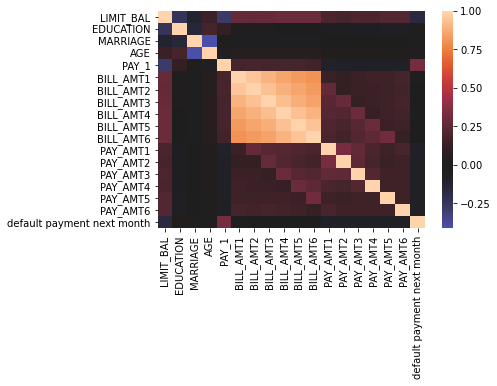

In [6]:
# Heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

#### F-test and Univariate Feature Selection   - ANOVA TEST

In [7]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape,y.shape)

(26664, 17) (26664,)


In [8]:
from sklearn.feature_selection import f_classif
[f_stat,f_p_value] = f_classif(X,y)

In [9]:
# Let's see column wise f_statistics and p_value
f_feast_df = pd.DataFrame({'Feature':features_response[:-1],
                            'F Statistic': f_stat,
                             'P value' : f_p_value})
f_feast_df.sort_values('P value')

,Feature,F Statistic,P value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


Note that for every decrease in p-value, there is an increase in the F-statistic, so the information in these columns is essentially the same in terms of ranking features.So we can see PAY_1 and LIMIT_BAL are important features

In [10]:
# TO SELECT THE 20% OF FEATURES ACCORDING TO THE HIGHEST VALUE OF F-TEST
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif,percentile=20)

In [11]:
selector.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001EFAFD691F8>)

In [12]:
# To know which features we have got we should use .get_support() method
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [13]:
# To extract the feature names we compare it with array of feature
features = features_response[:-1]
best_features = [features[counter] for counter in range (len(features)) if best_feature_ix[counter]]

In [14]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

#### Visualizing the Relationship between Features and Response

First considering a feature 'PAY_1'

In [15]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [16]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


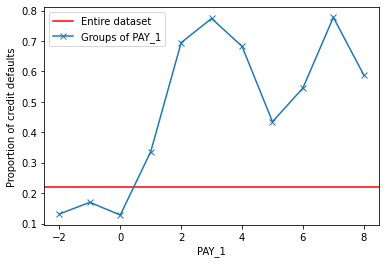

In [17]:
# Let's visualize this through a plot
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

Now Let's look at 'LIMIT_BAL'

In [18]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

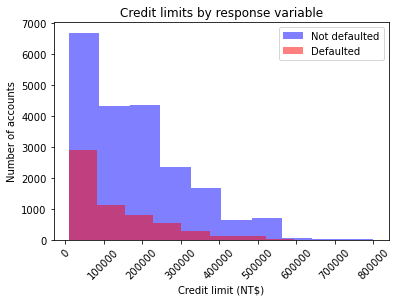

In [19]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [20]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

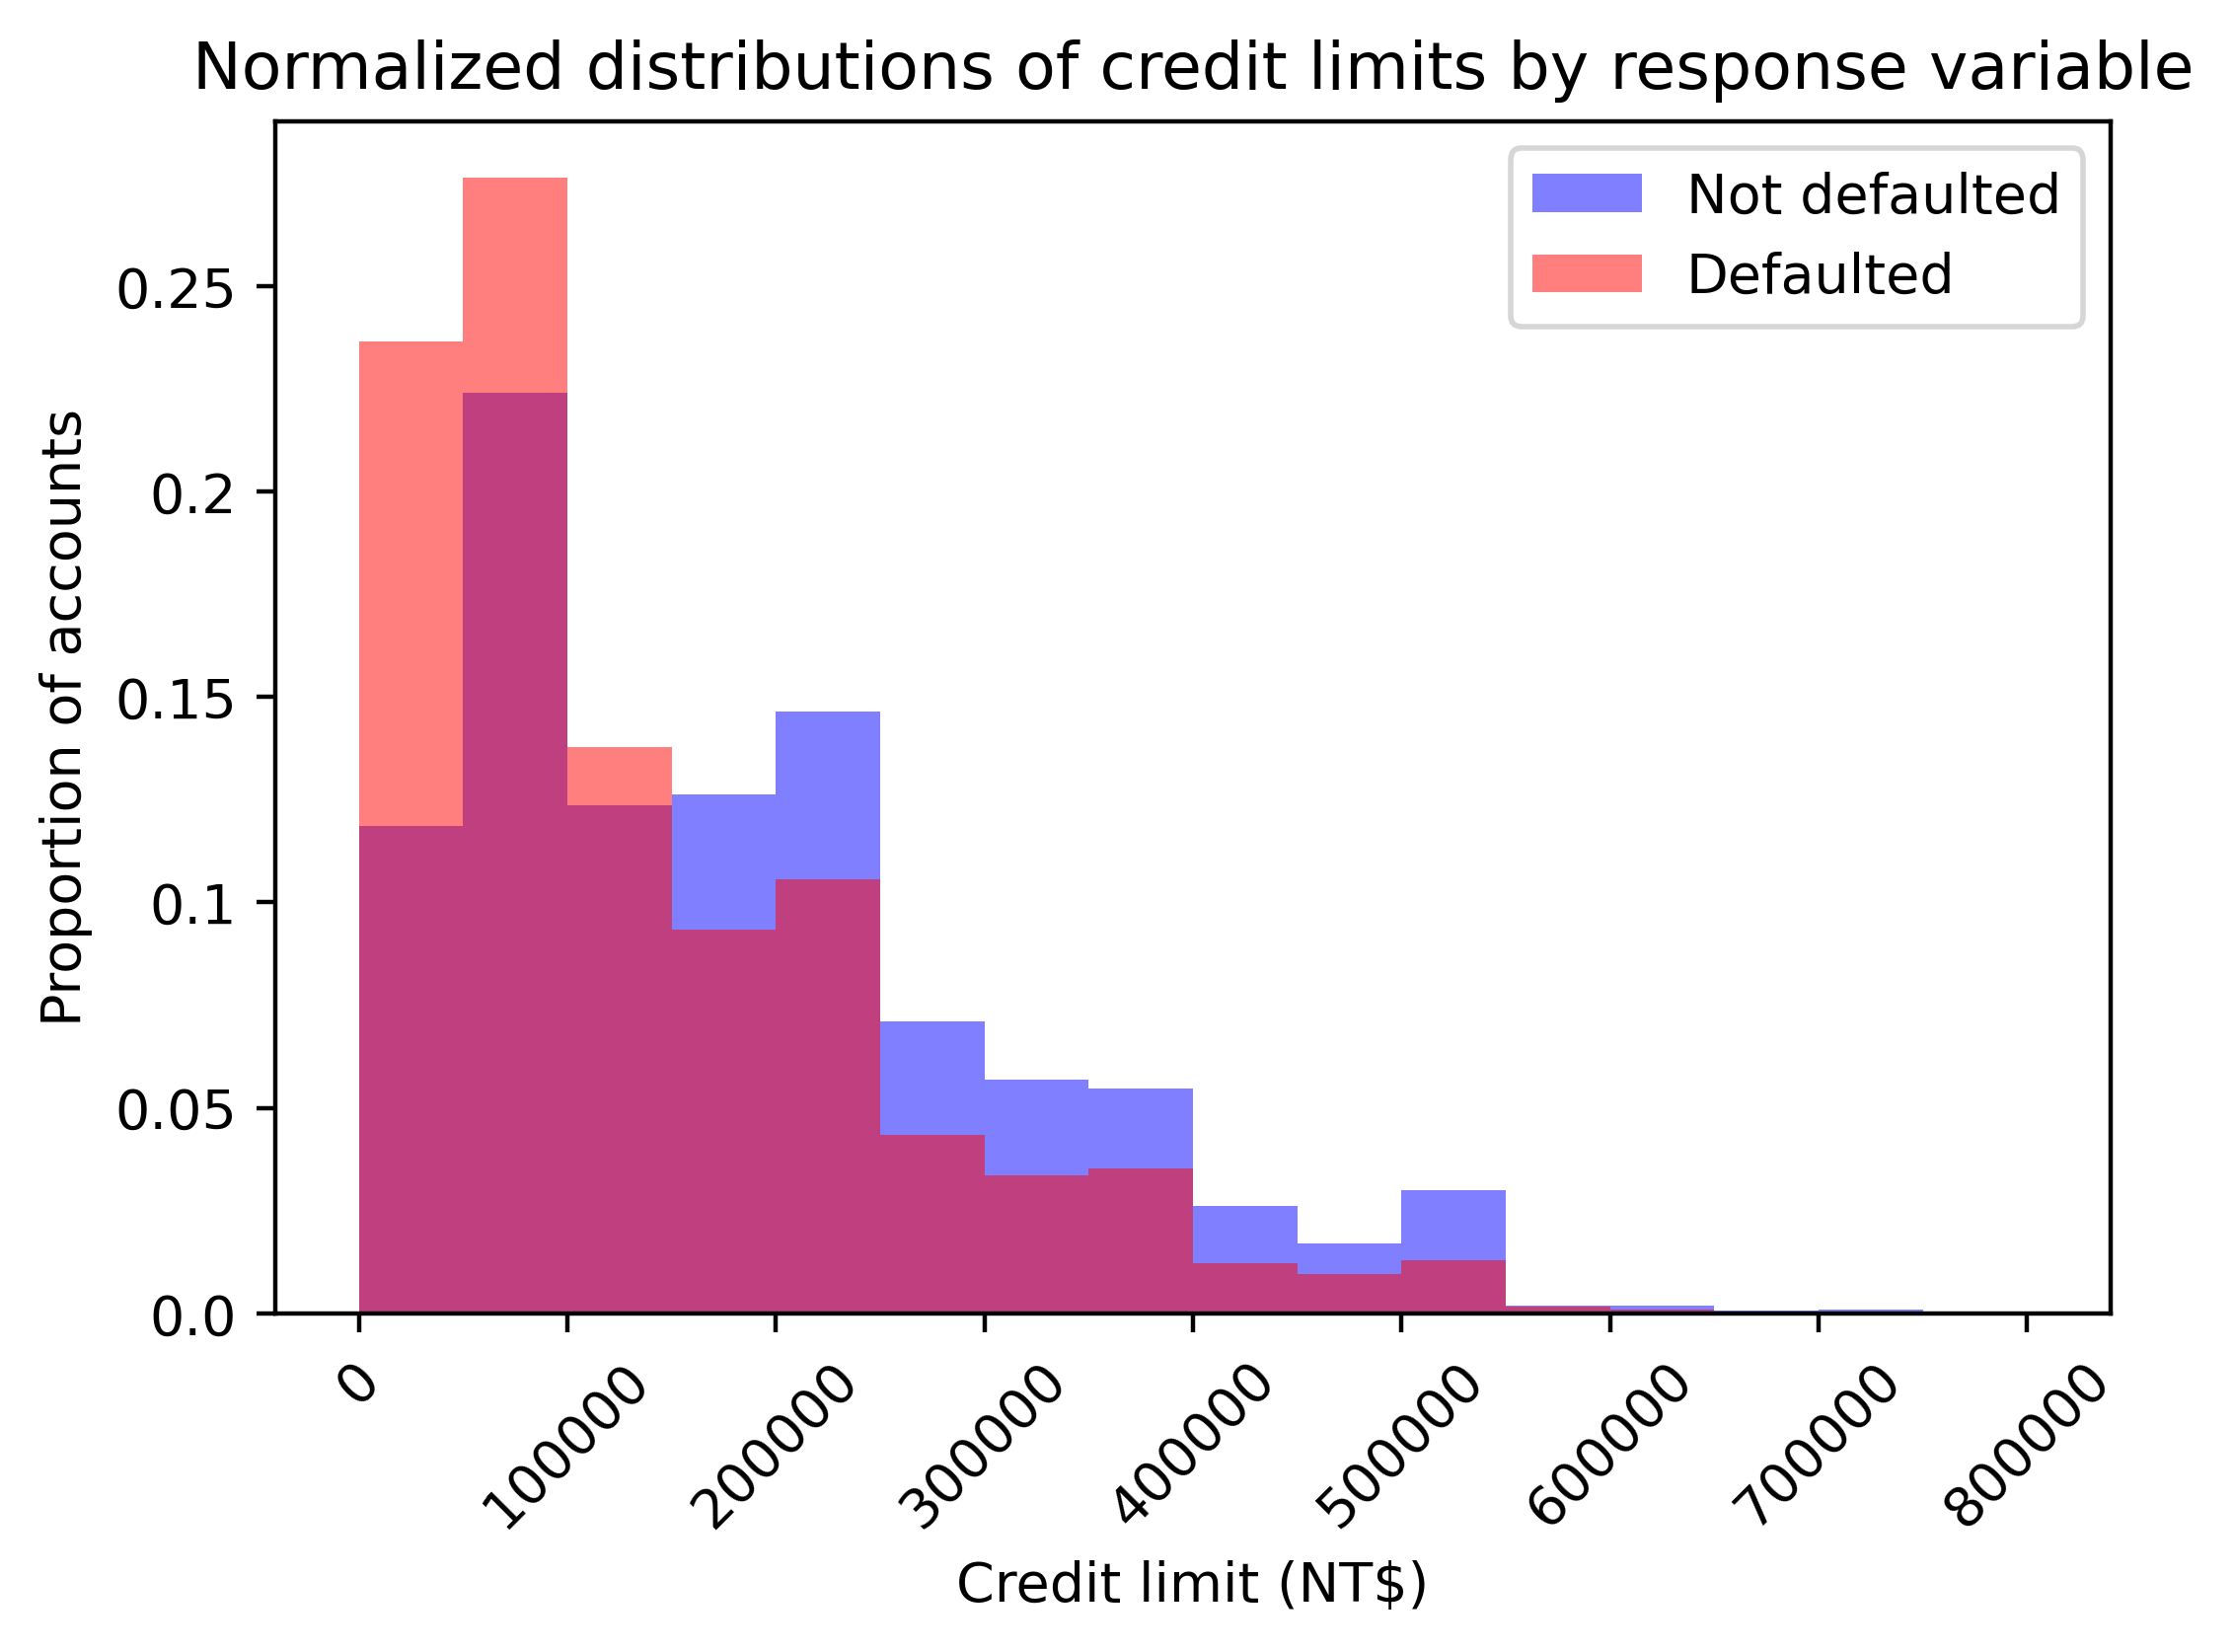

In [21]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

##### Understanding Logistic Regression with function Syntax in Python and the Sigmoid Function

In [22]:
# Functions
def my_mean(input_arguments):
    output = sum(input_arguments)/len(input_arguments)
    return(output)

In [23]:
my_mean([5])

5.0

In [24]:
my_mean(input_arguments=[1,2,3])

2.0

In [25]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [26]:
Y_exp = np.exp(X_exp)
Y_exp

array([1.83156389e-02, 2.02419114e-02, 2.23707719e-02, 2.47235265e-02,
       2.73237224e-02, 3.01973834e-02, 3.33732700e-02, 3.68831674e-02,
       4.07622040e-02, 4.50492024e-02, 4.97870684e-02, 5.50232201e-02,
       6.08100626e-02, 6.72055127e-02, 7.42735782e-02, 8.20849986e-02,
       9.07179533e-02, 1.00258844e-01, 1.10803158e-01, 1.22456428e-01,
       1.35335283e-01, 1.49568619e-01, 1.65298888e-01, 1.82683524e-01,
       2.01896518e-01, 2.23130160e-01, 2.46596964e-01, 2.72531793e-01,
       3.01194212e-01, 3.32871084e-01, 3.67879441e-01, 4.06569660e-01,
       4.49328964e-01, 4.96585304e-01, 5.48811636e-01, 6.06530660e-01,
       6.70320046e-01, 7.40818221e-01, 8.18730753e-01, 9.04837418e-01,
       1.00000000e+00, 1.10517092e+00, 1.22140276e+00, 1.34985881e+00,
       1.49182470e+00, 1.64872127e+00, 1.82211880e+00, 2.01375271e+00,
       2.22554093e+00, 2.45960311e+00, 2.71828183e+00, 3.00416602e+00,
       3.32011692e+00, 3.66929667e+00, 4.05519997e+00, 4.48168907e+00,
      

##### Plotting the Sigmoid Function


Text(0.5, 1.0, 'Plot of $e^X$')

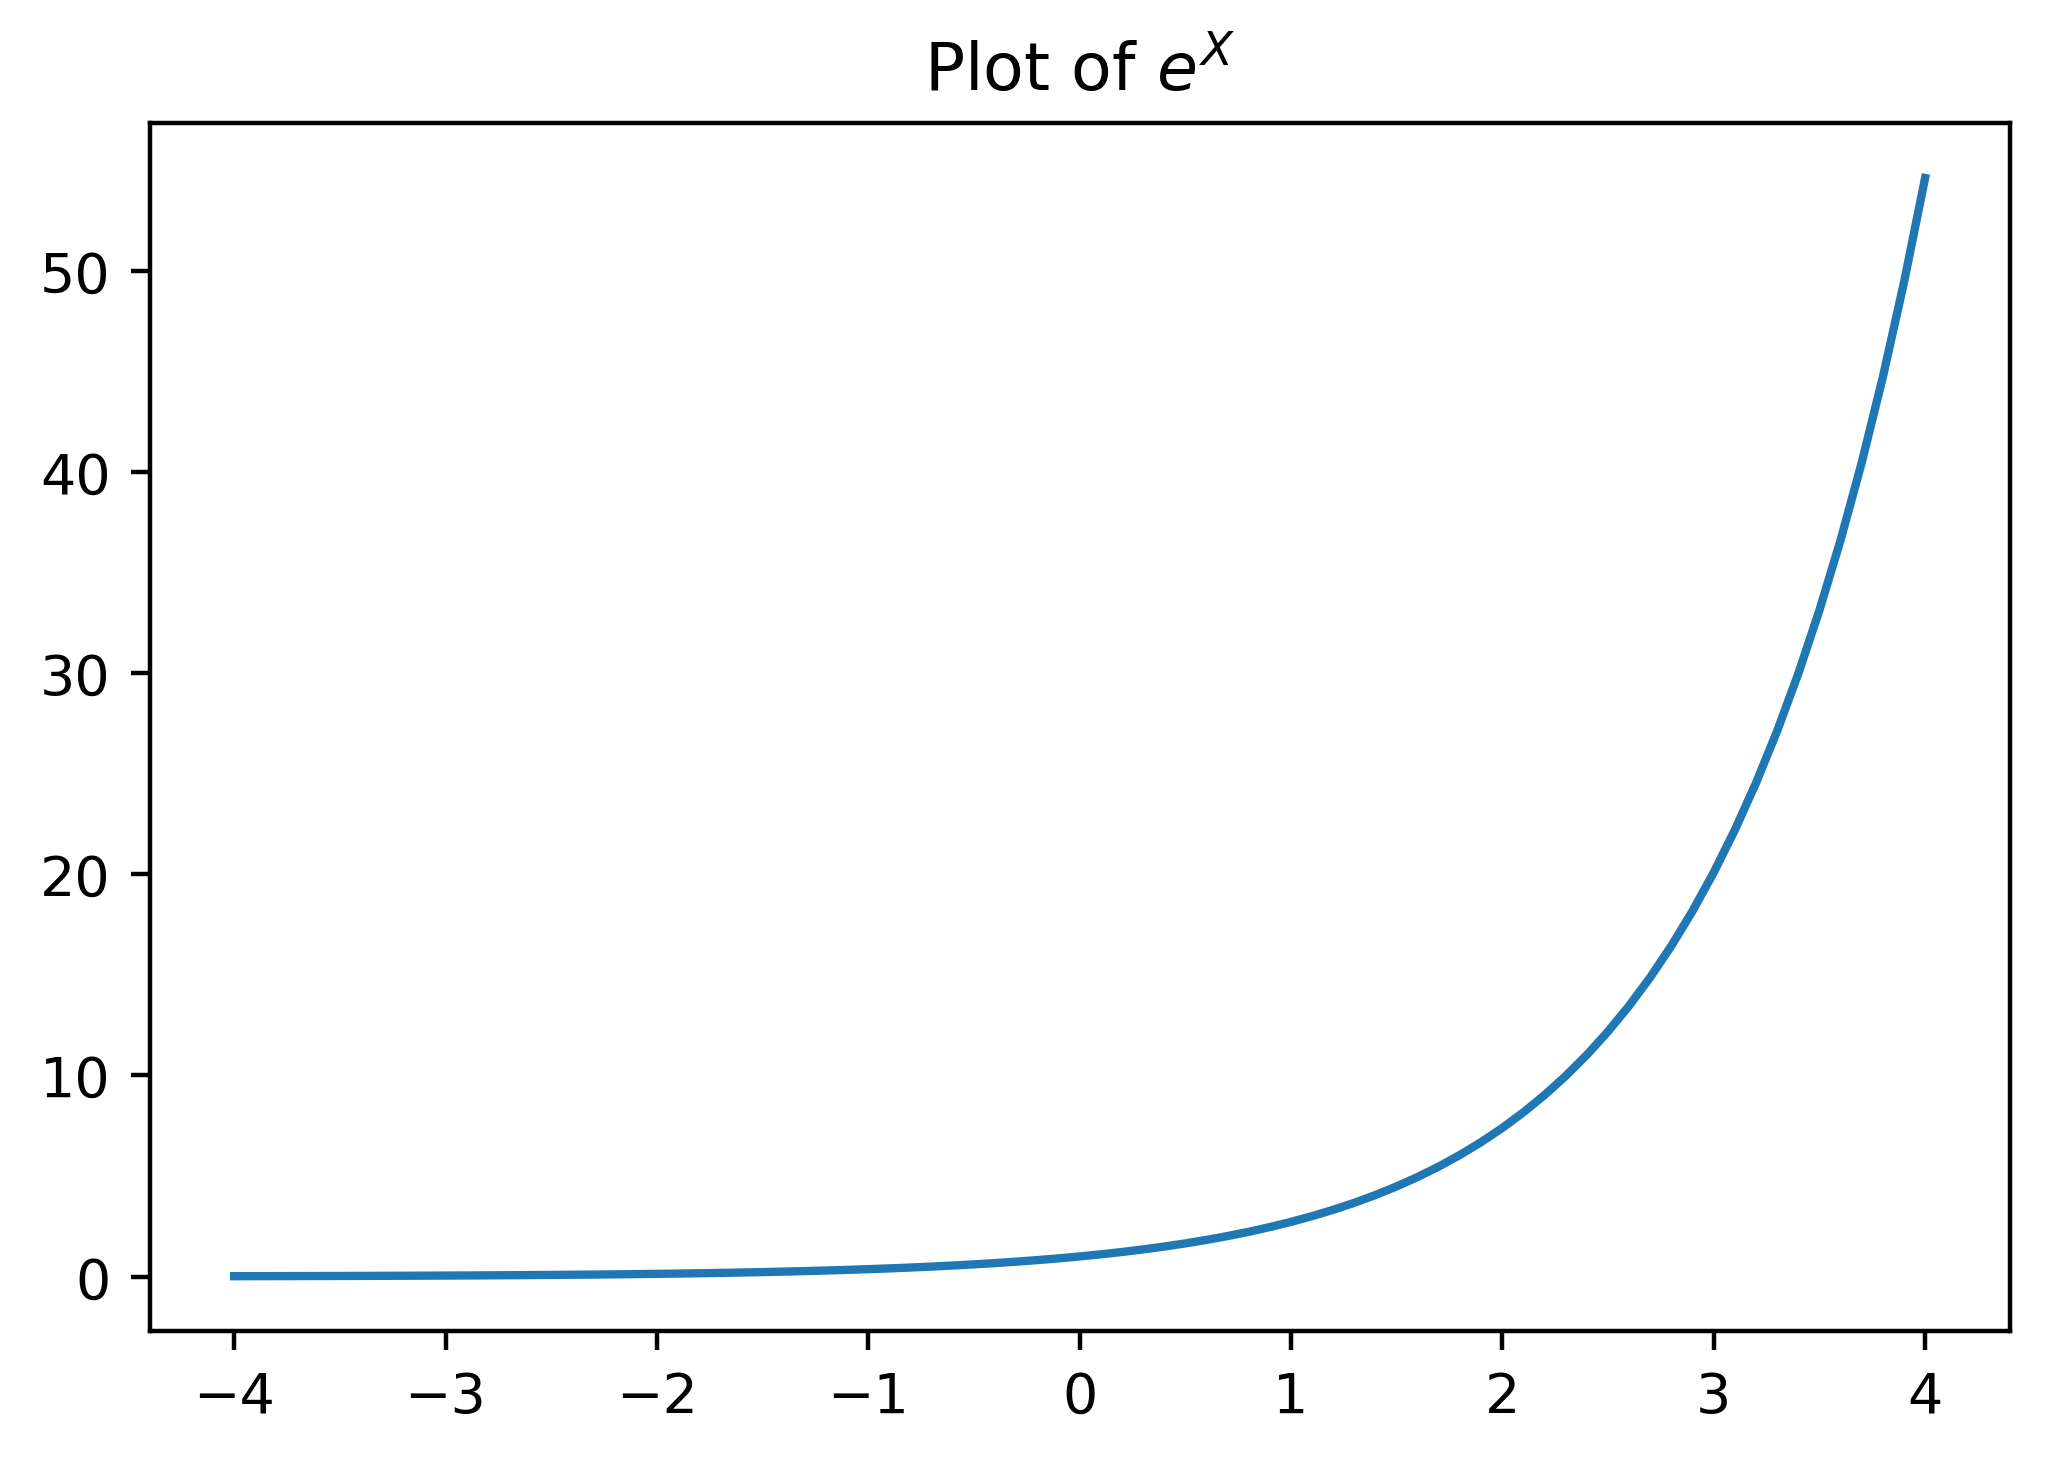

In [27]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

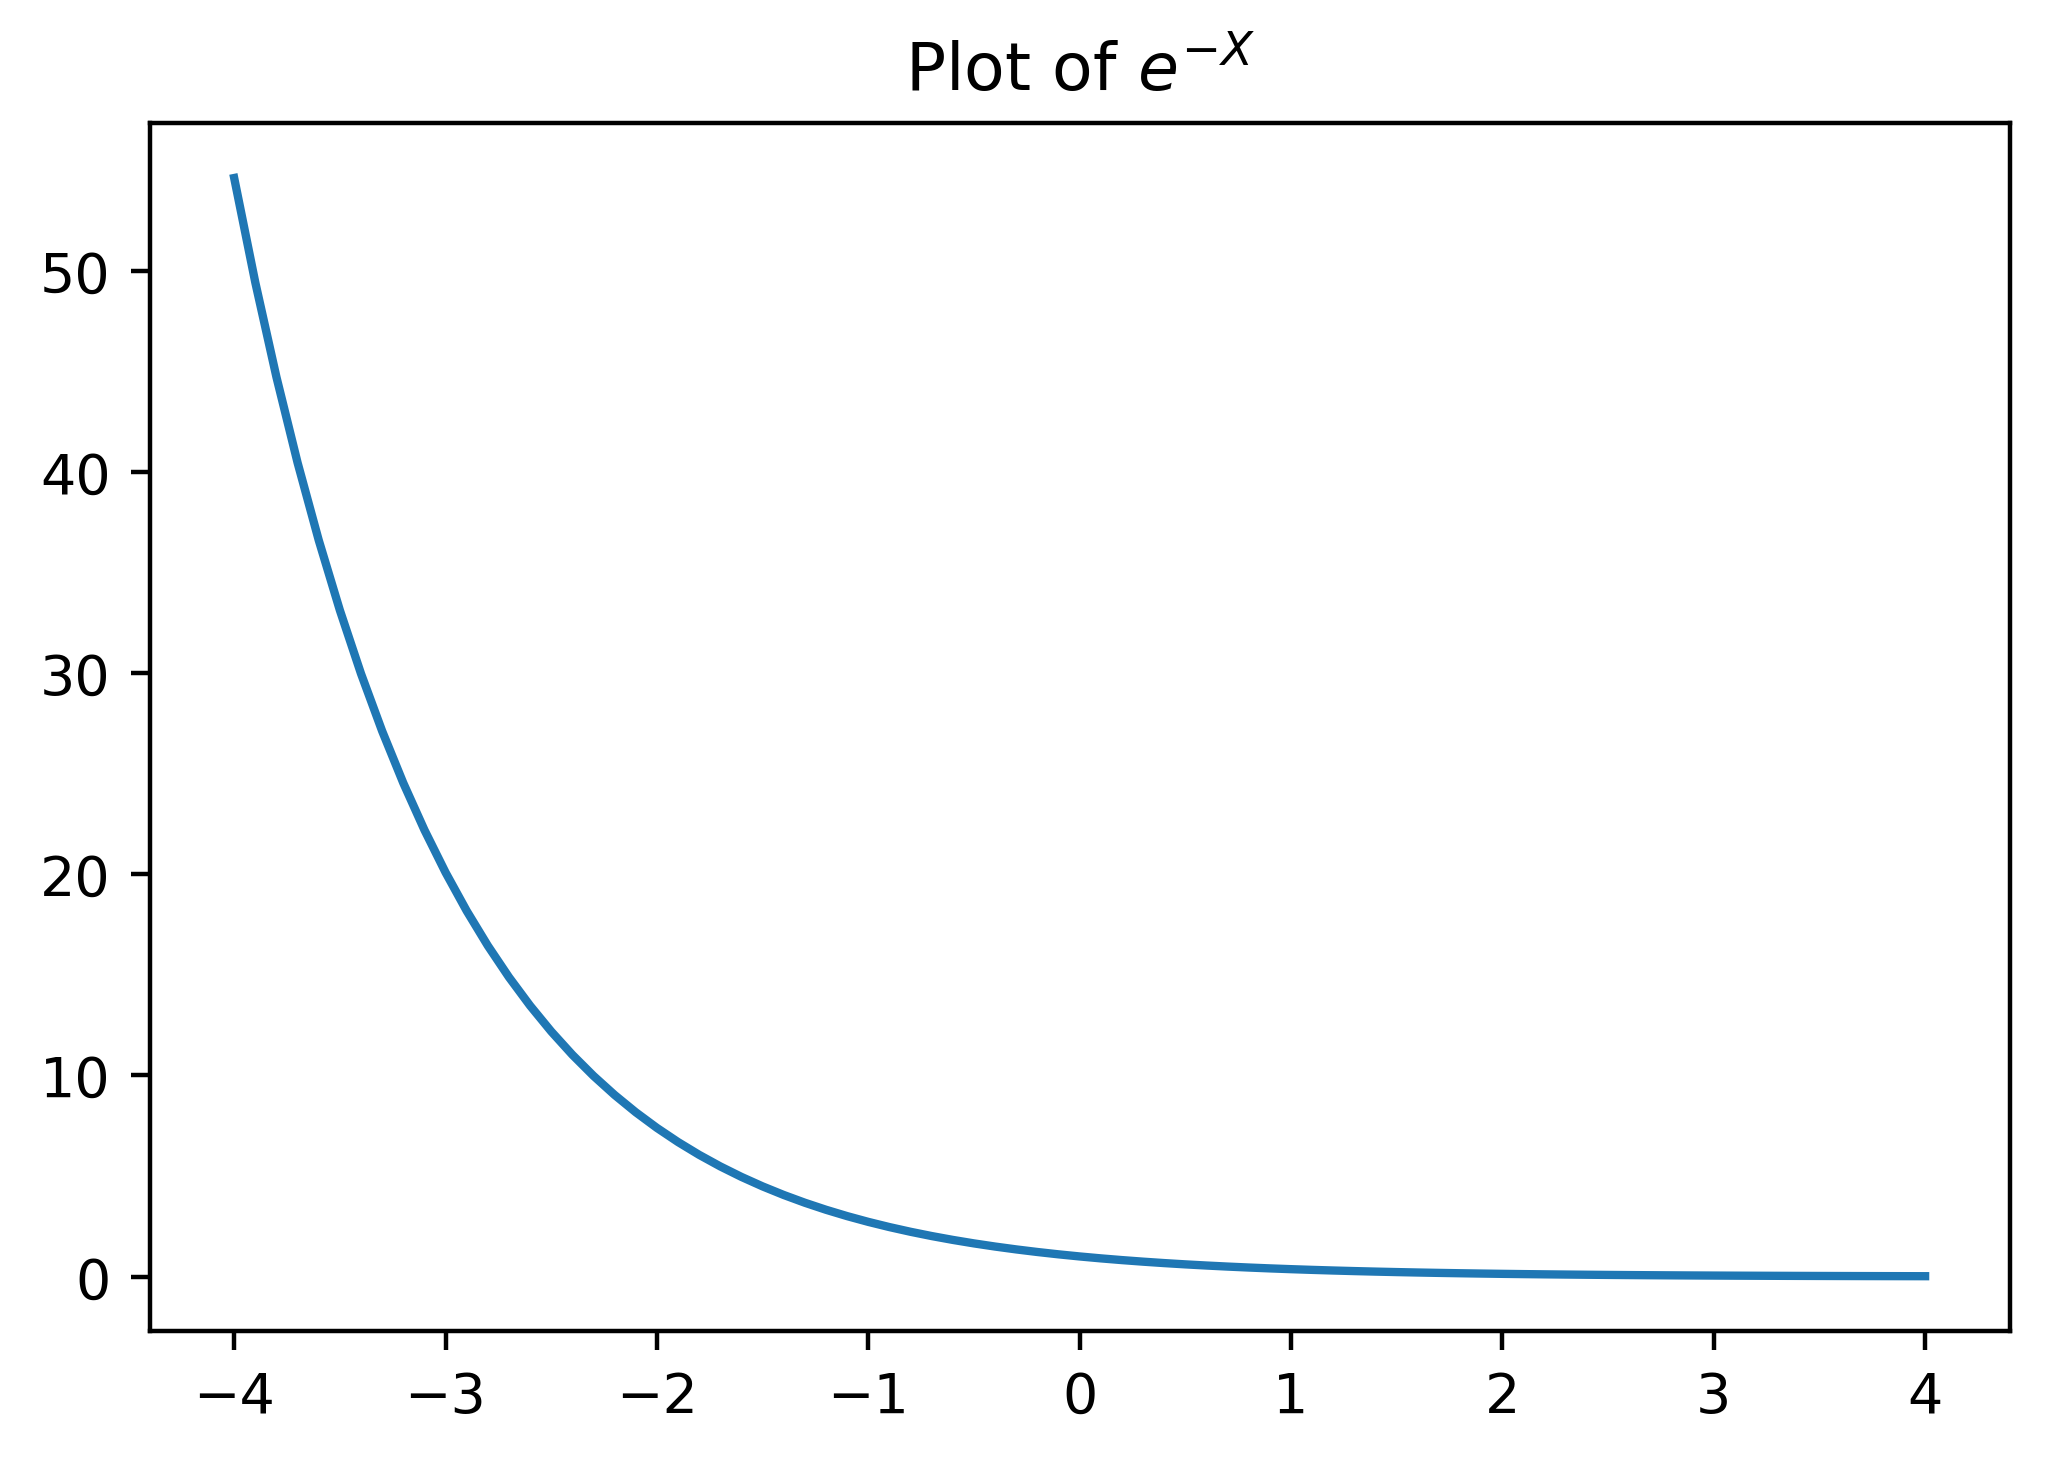

In [28]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [29]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

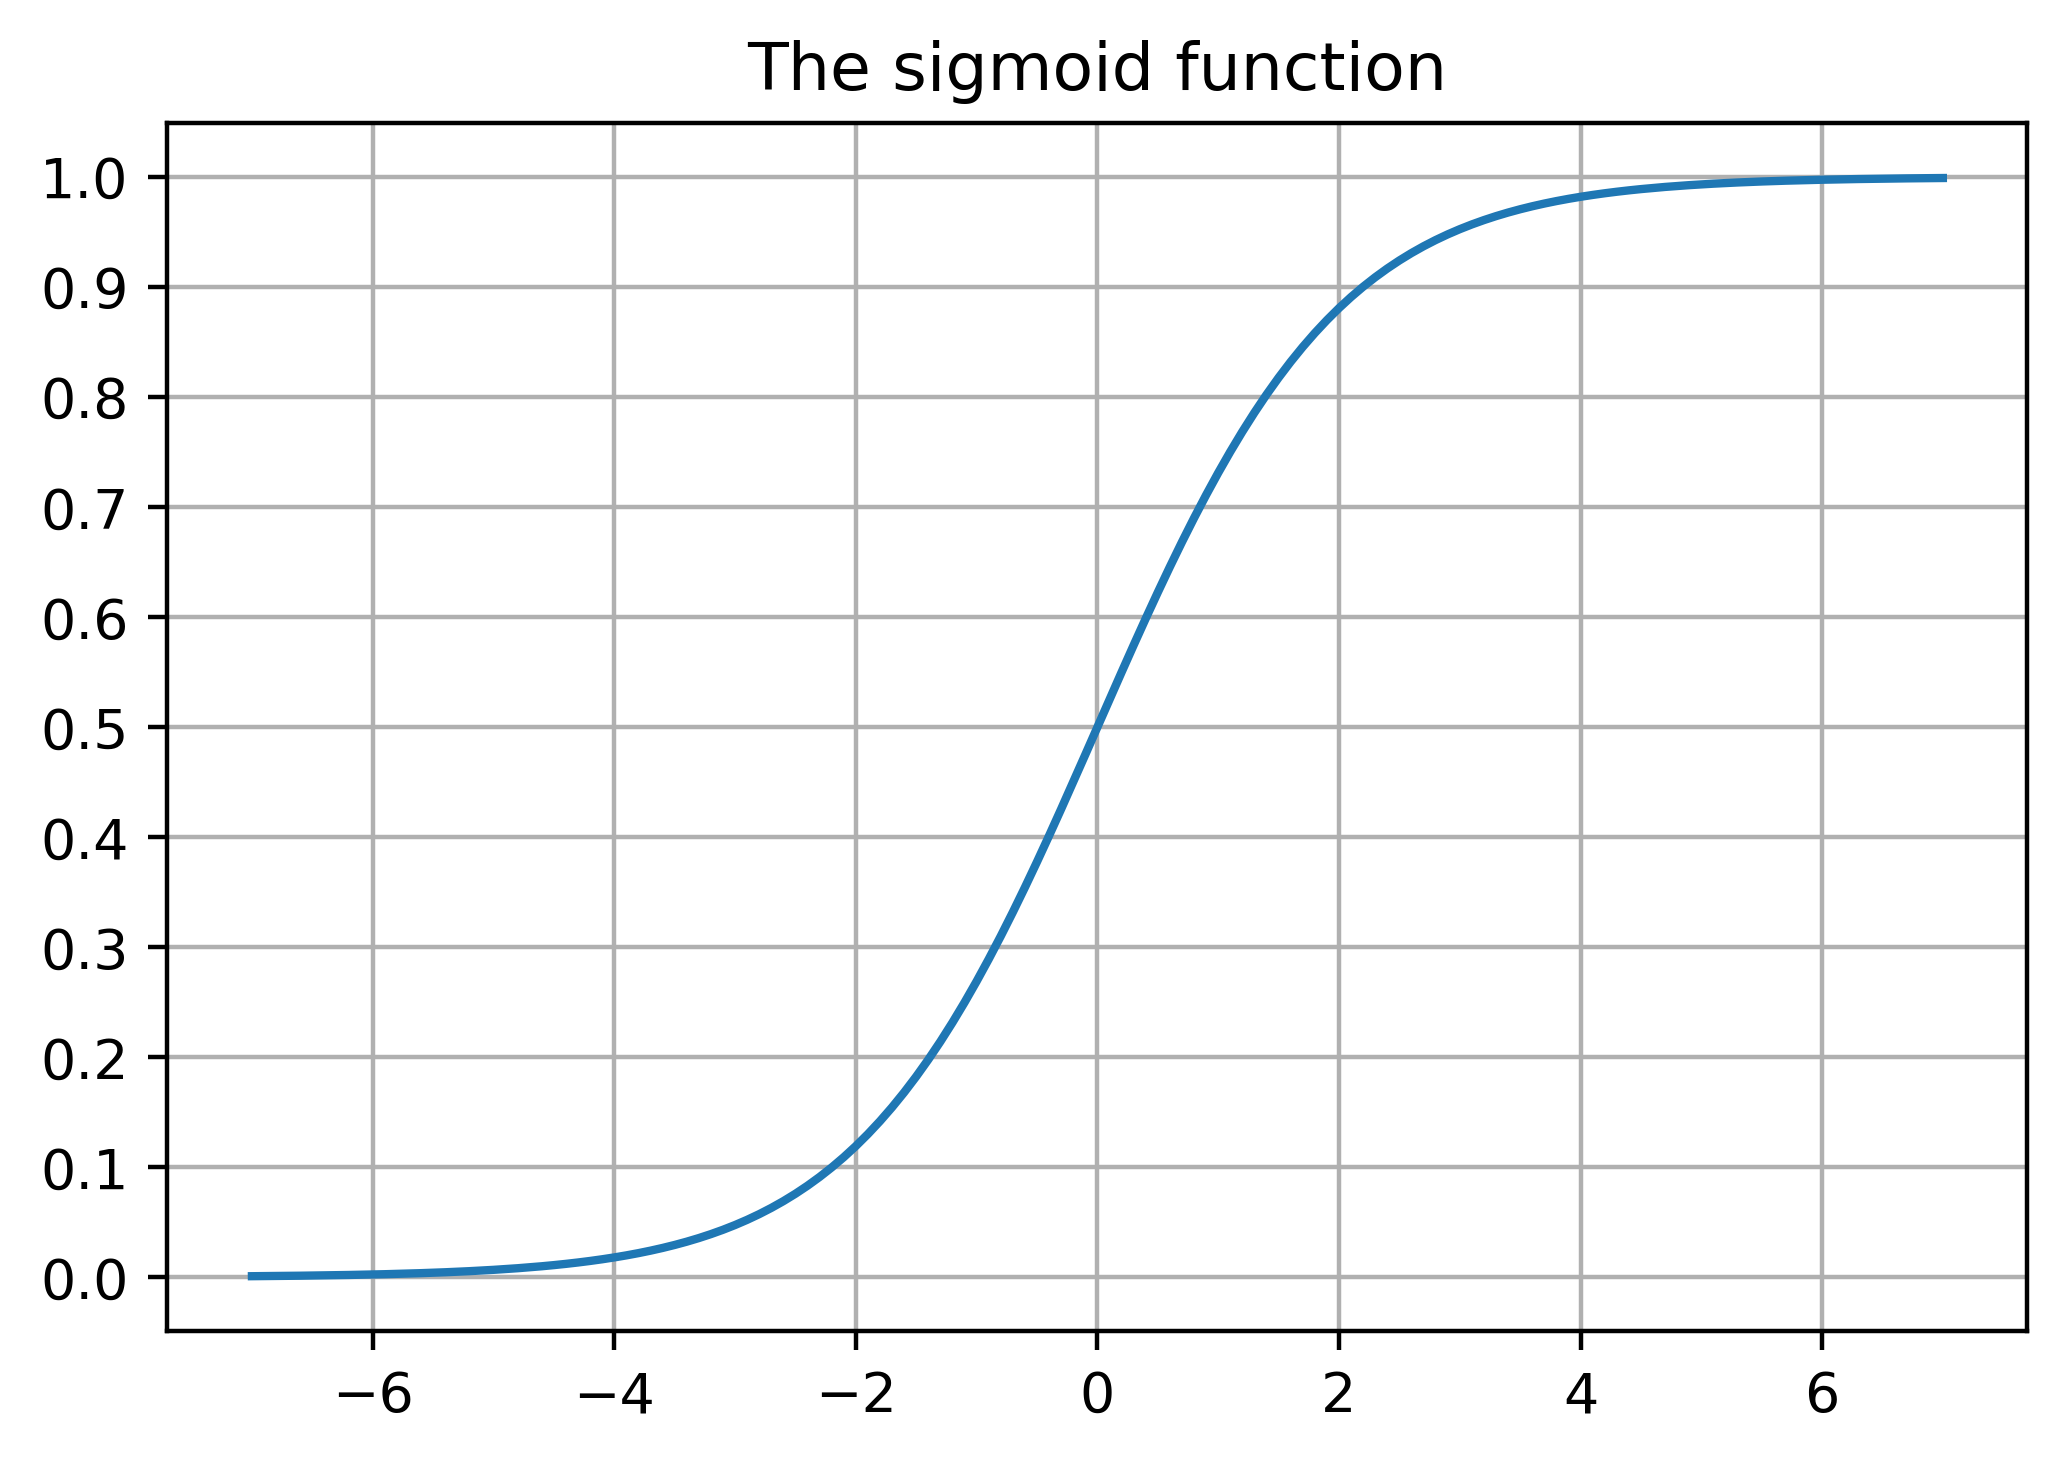

In [30]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

#### Scope of Functions

In [31]:
example_global_variable = 1
def example_function():
    output = example_global_variable + 1
    return(output)
example_function()

2

In [32]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [33]:
p = group_by_pay_mean_y['default payment next month'].values
p

array([0.13166397, 0.17000198, 0.12829525, 0.33639988, 0.69470143,
       0.7739726 , 0.68253968, 0.43478261, 0.54545455, 0.77777778,
       0.58823529])

In [34]:
# Let's calcuate the q
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [35]:
# Odds ratio
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

Text(0, 0.5, 'values of PAY_1')

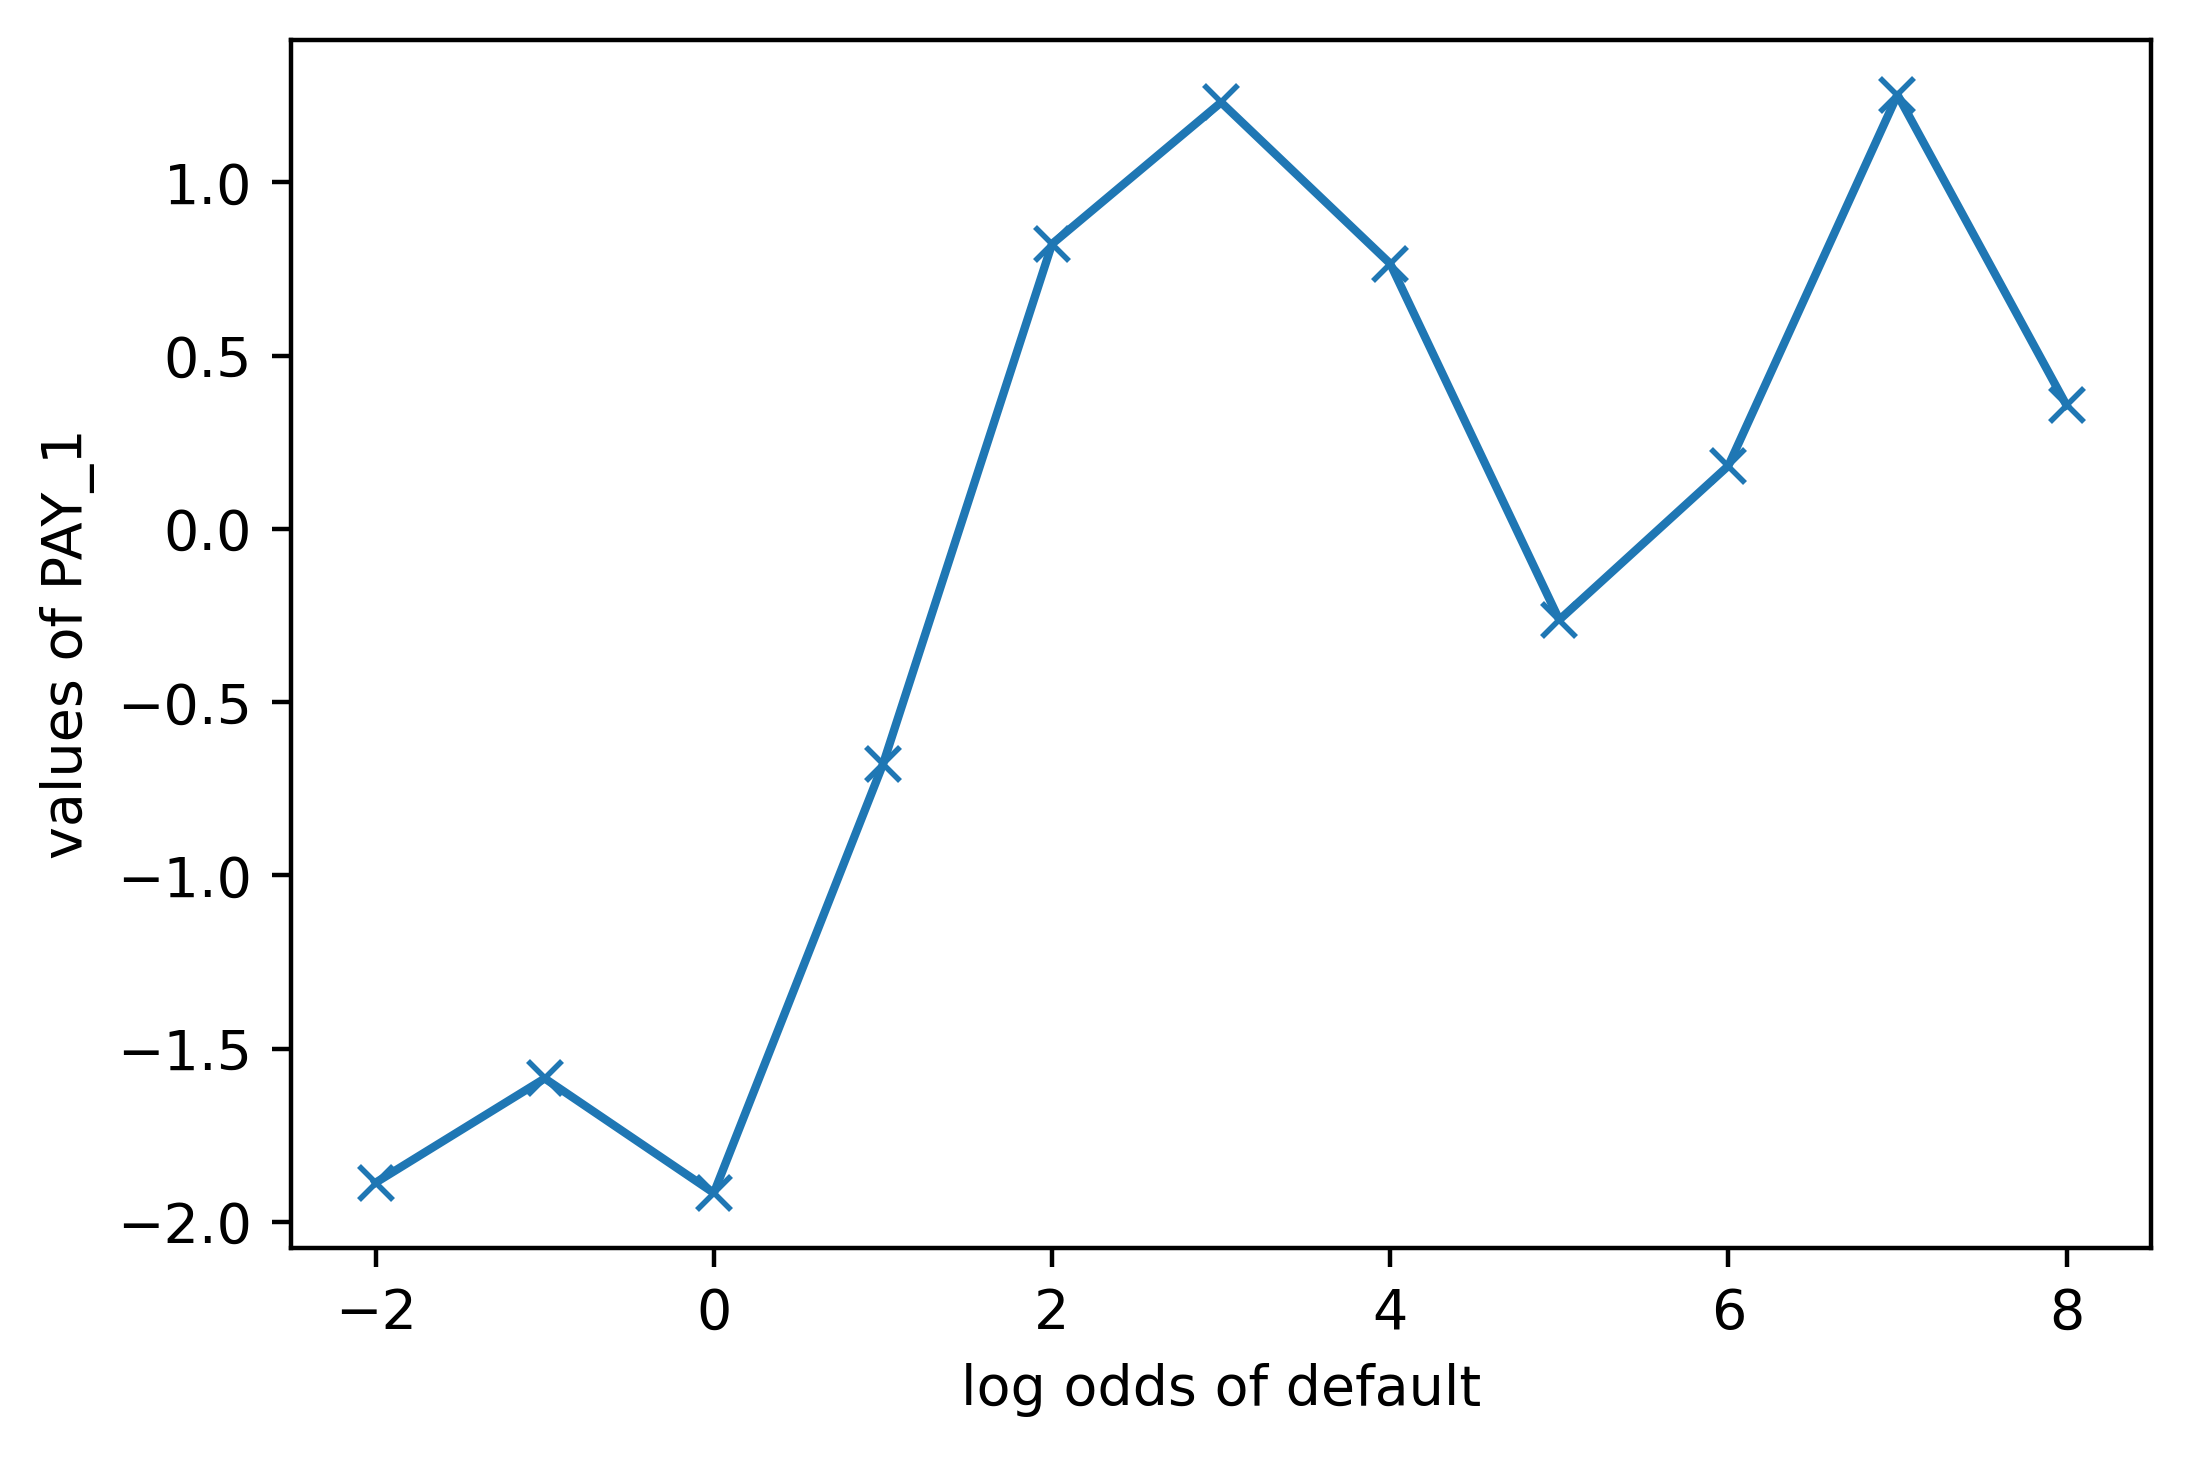

In [36]:
plt.plot( group_by_pay_mean_y.index,log_odds,'-x')
plt.xlabel('log odds of default')
plt.ylabel('values of PAY_1')

#### Linear Decision Boundary of Logistic Regression


In [37]:
# Generating random X1 and X2 numbers

np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


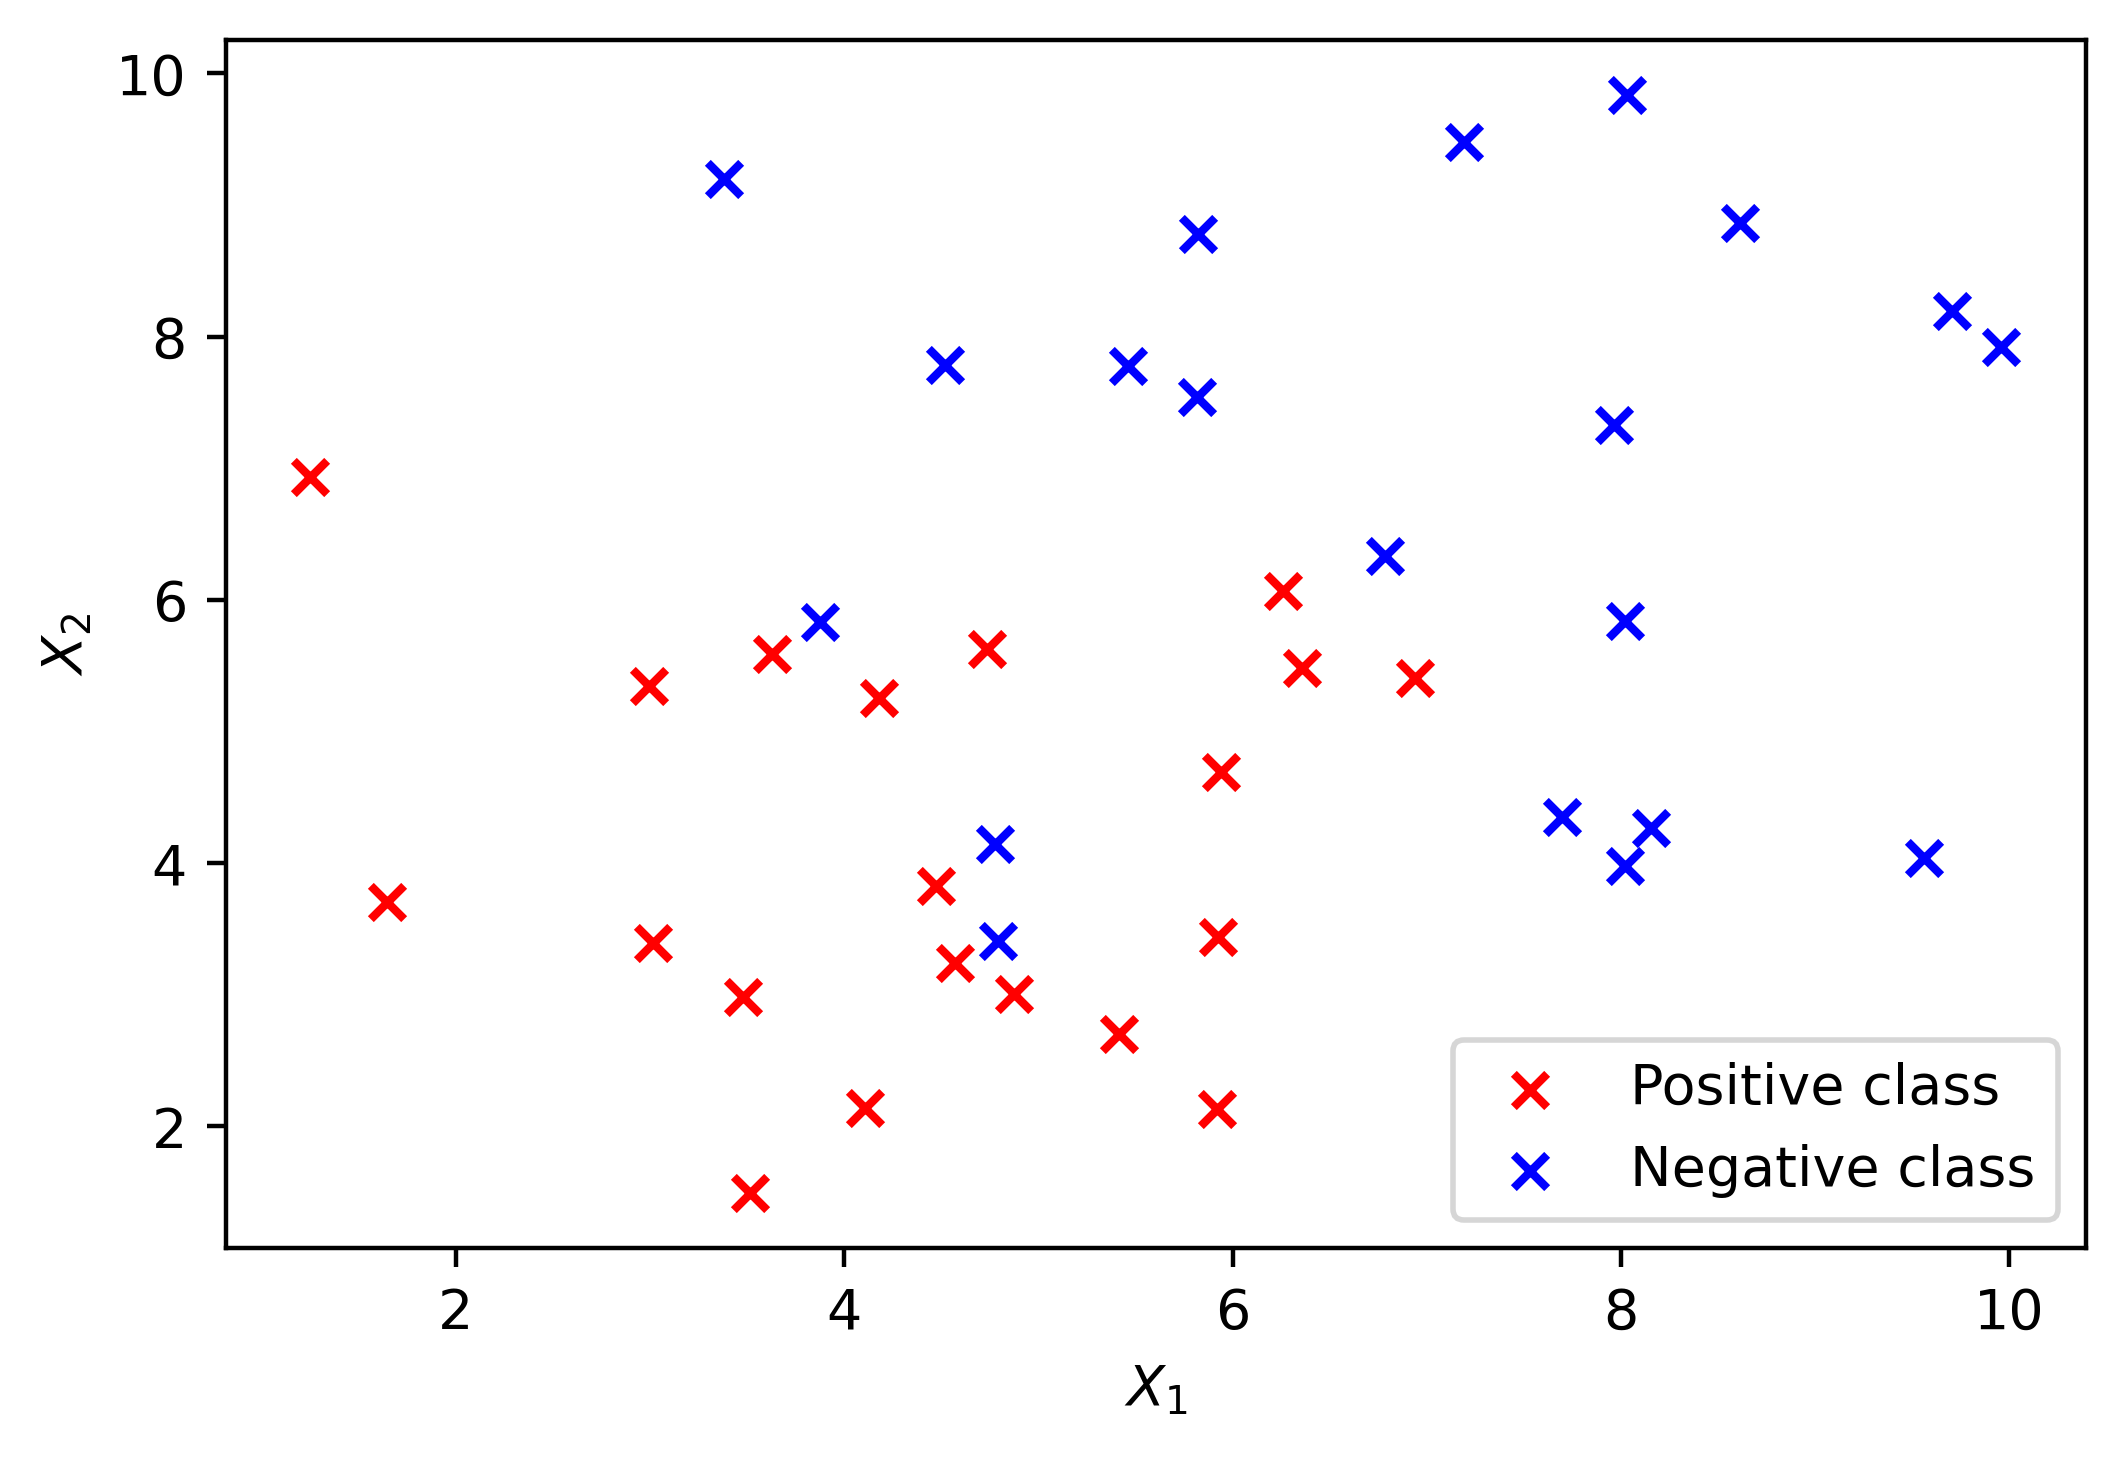

In [38]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [39]:
# Let's arrange them in order of 40*2 matrix
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [40]:
# Let's set response variable
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [41]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
example_lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

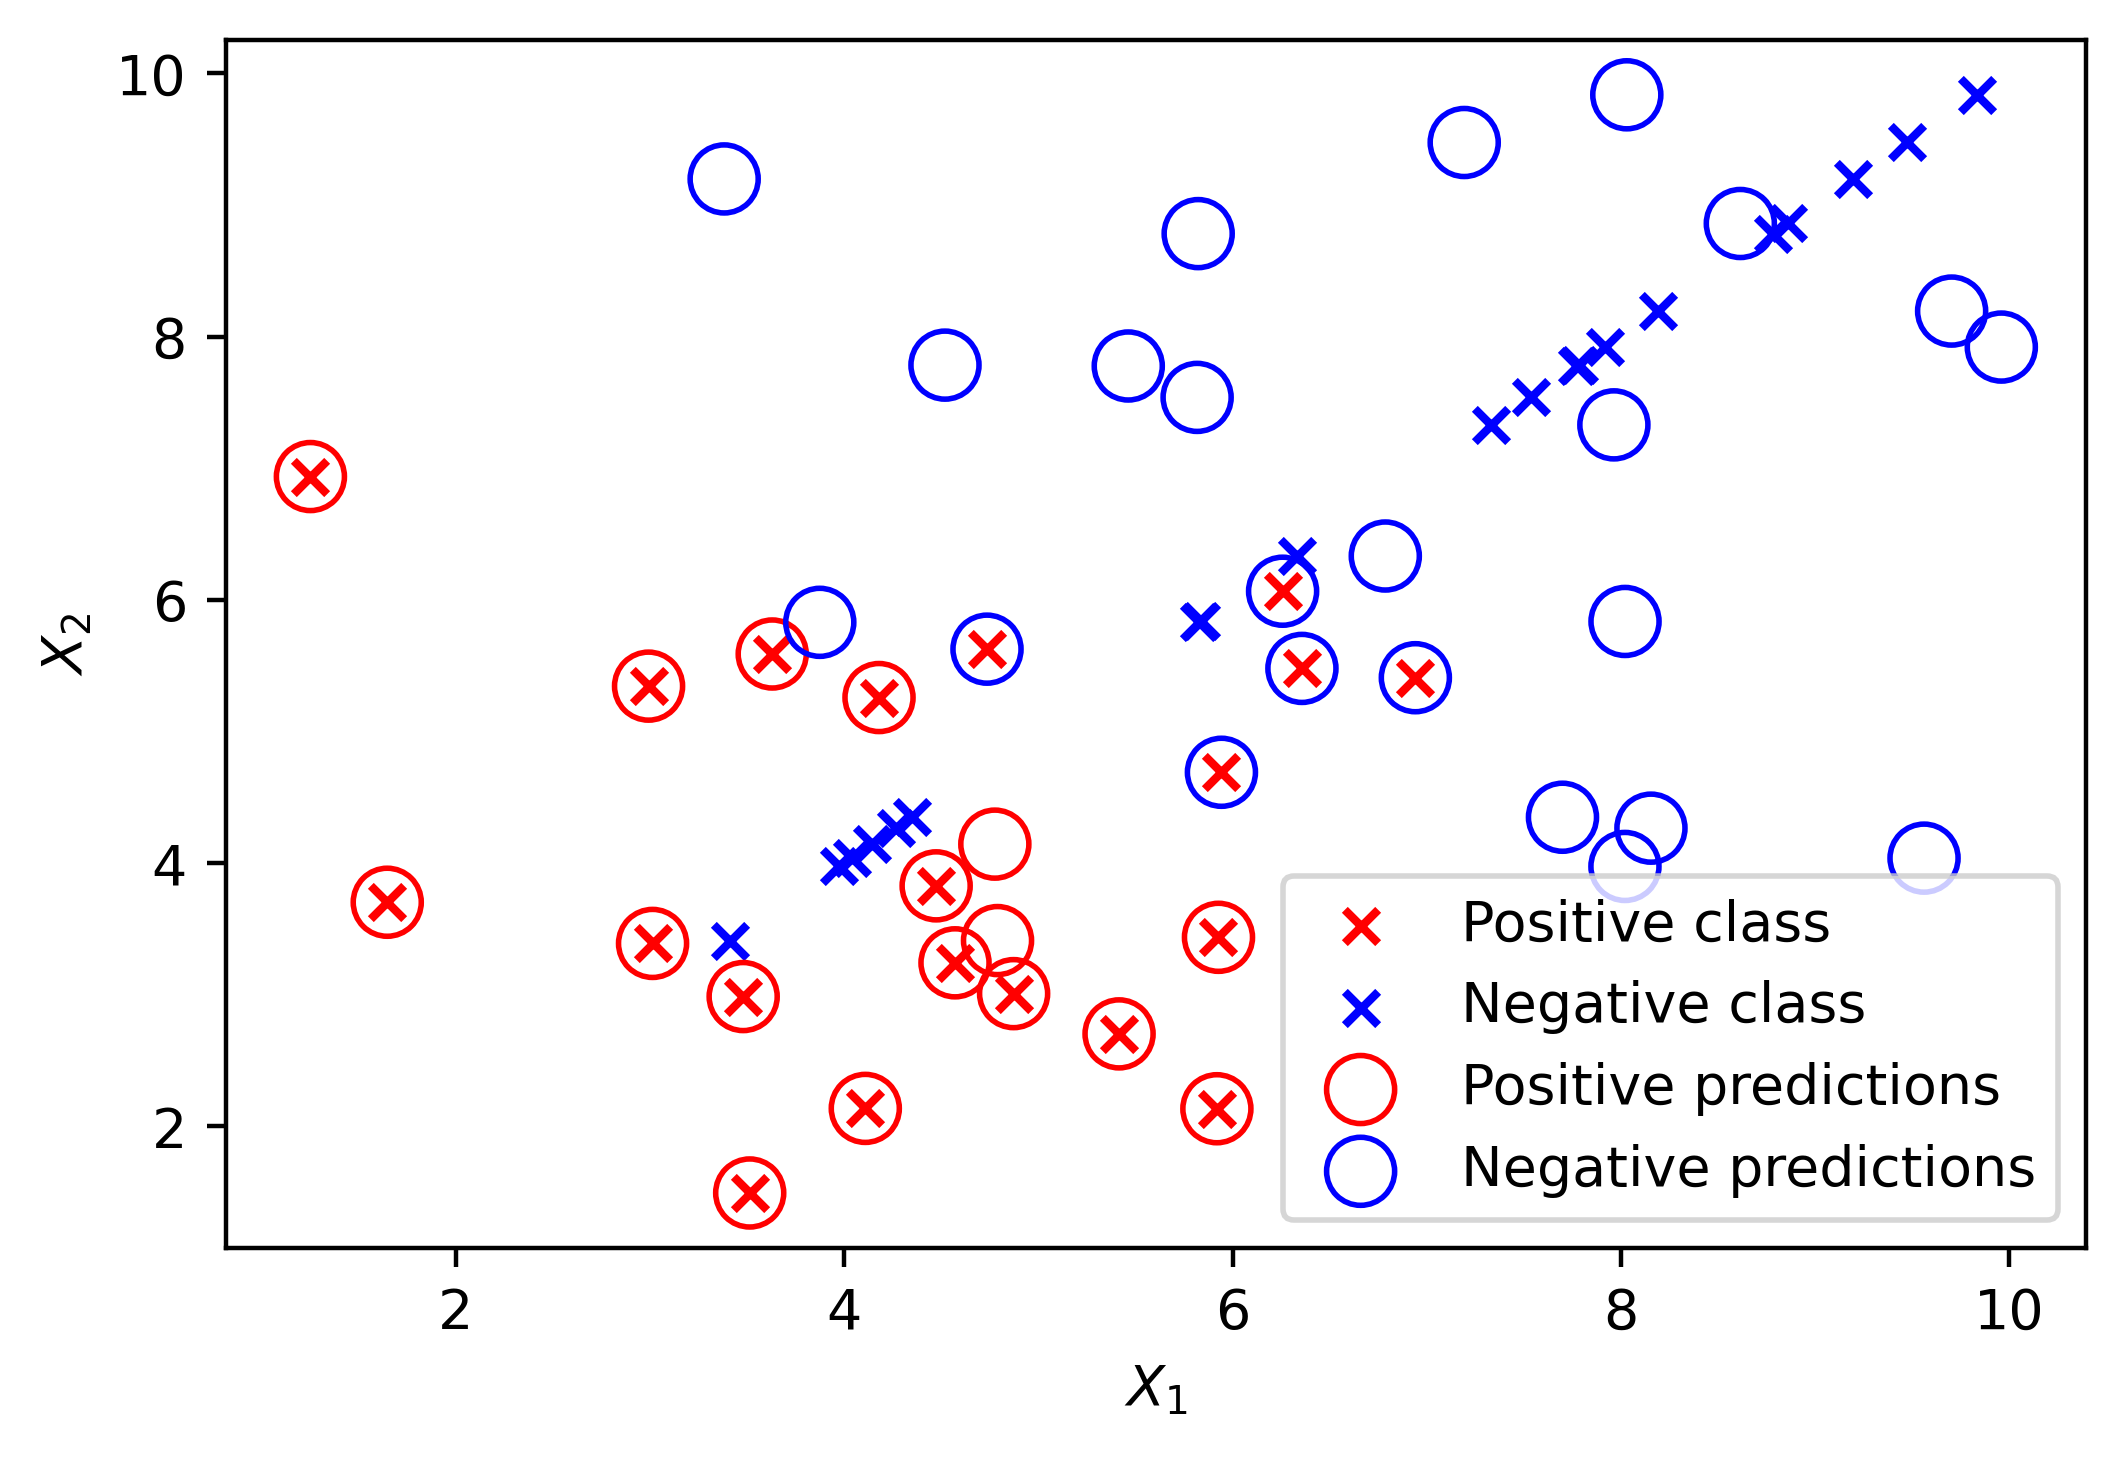

In [44]:
# Let's plot it and see
plt.scatter(X_1_pos,X_2_pos,color='red',marker='x')
plt.scatter(X_2_neg,X_2_neg,color='blue',marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

In [45]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285836 -0.25336423626773225


In [46]:
theta_0 = example_lr.intercept_

In [47]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

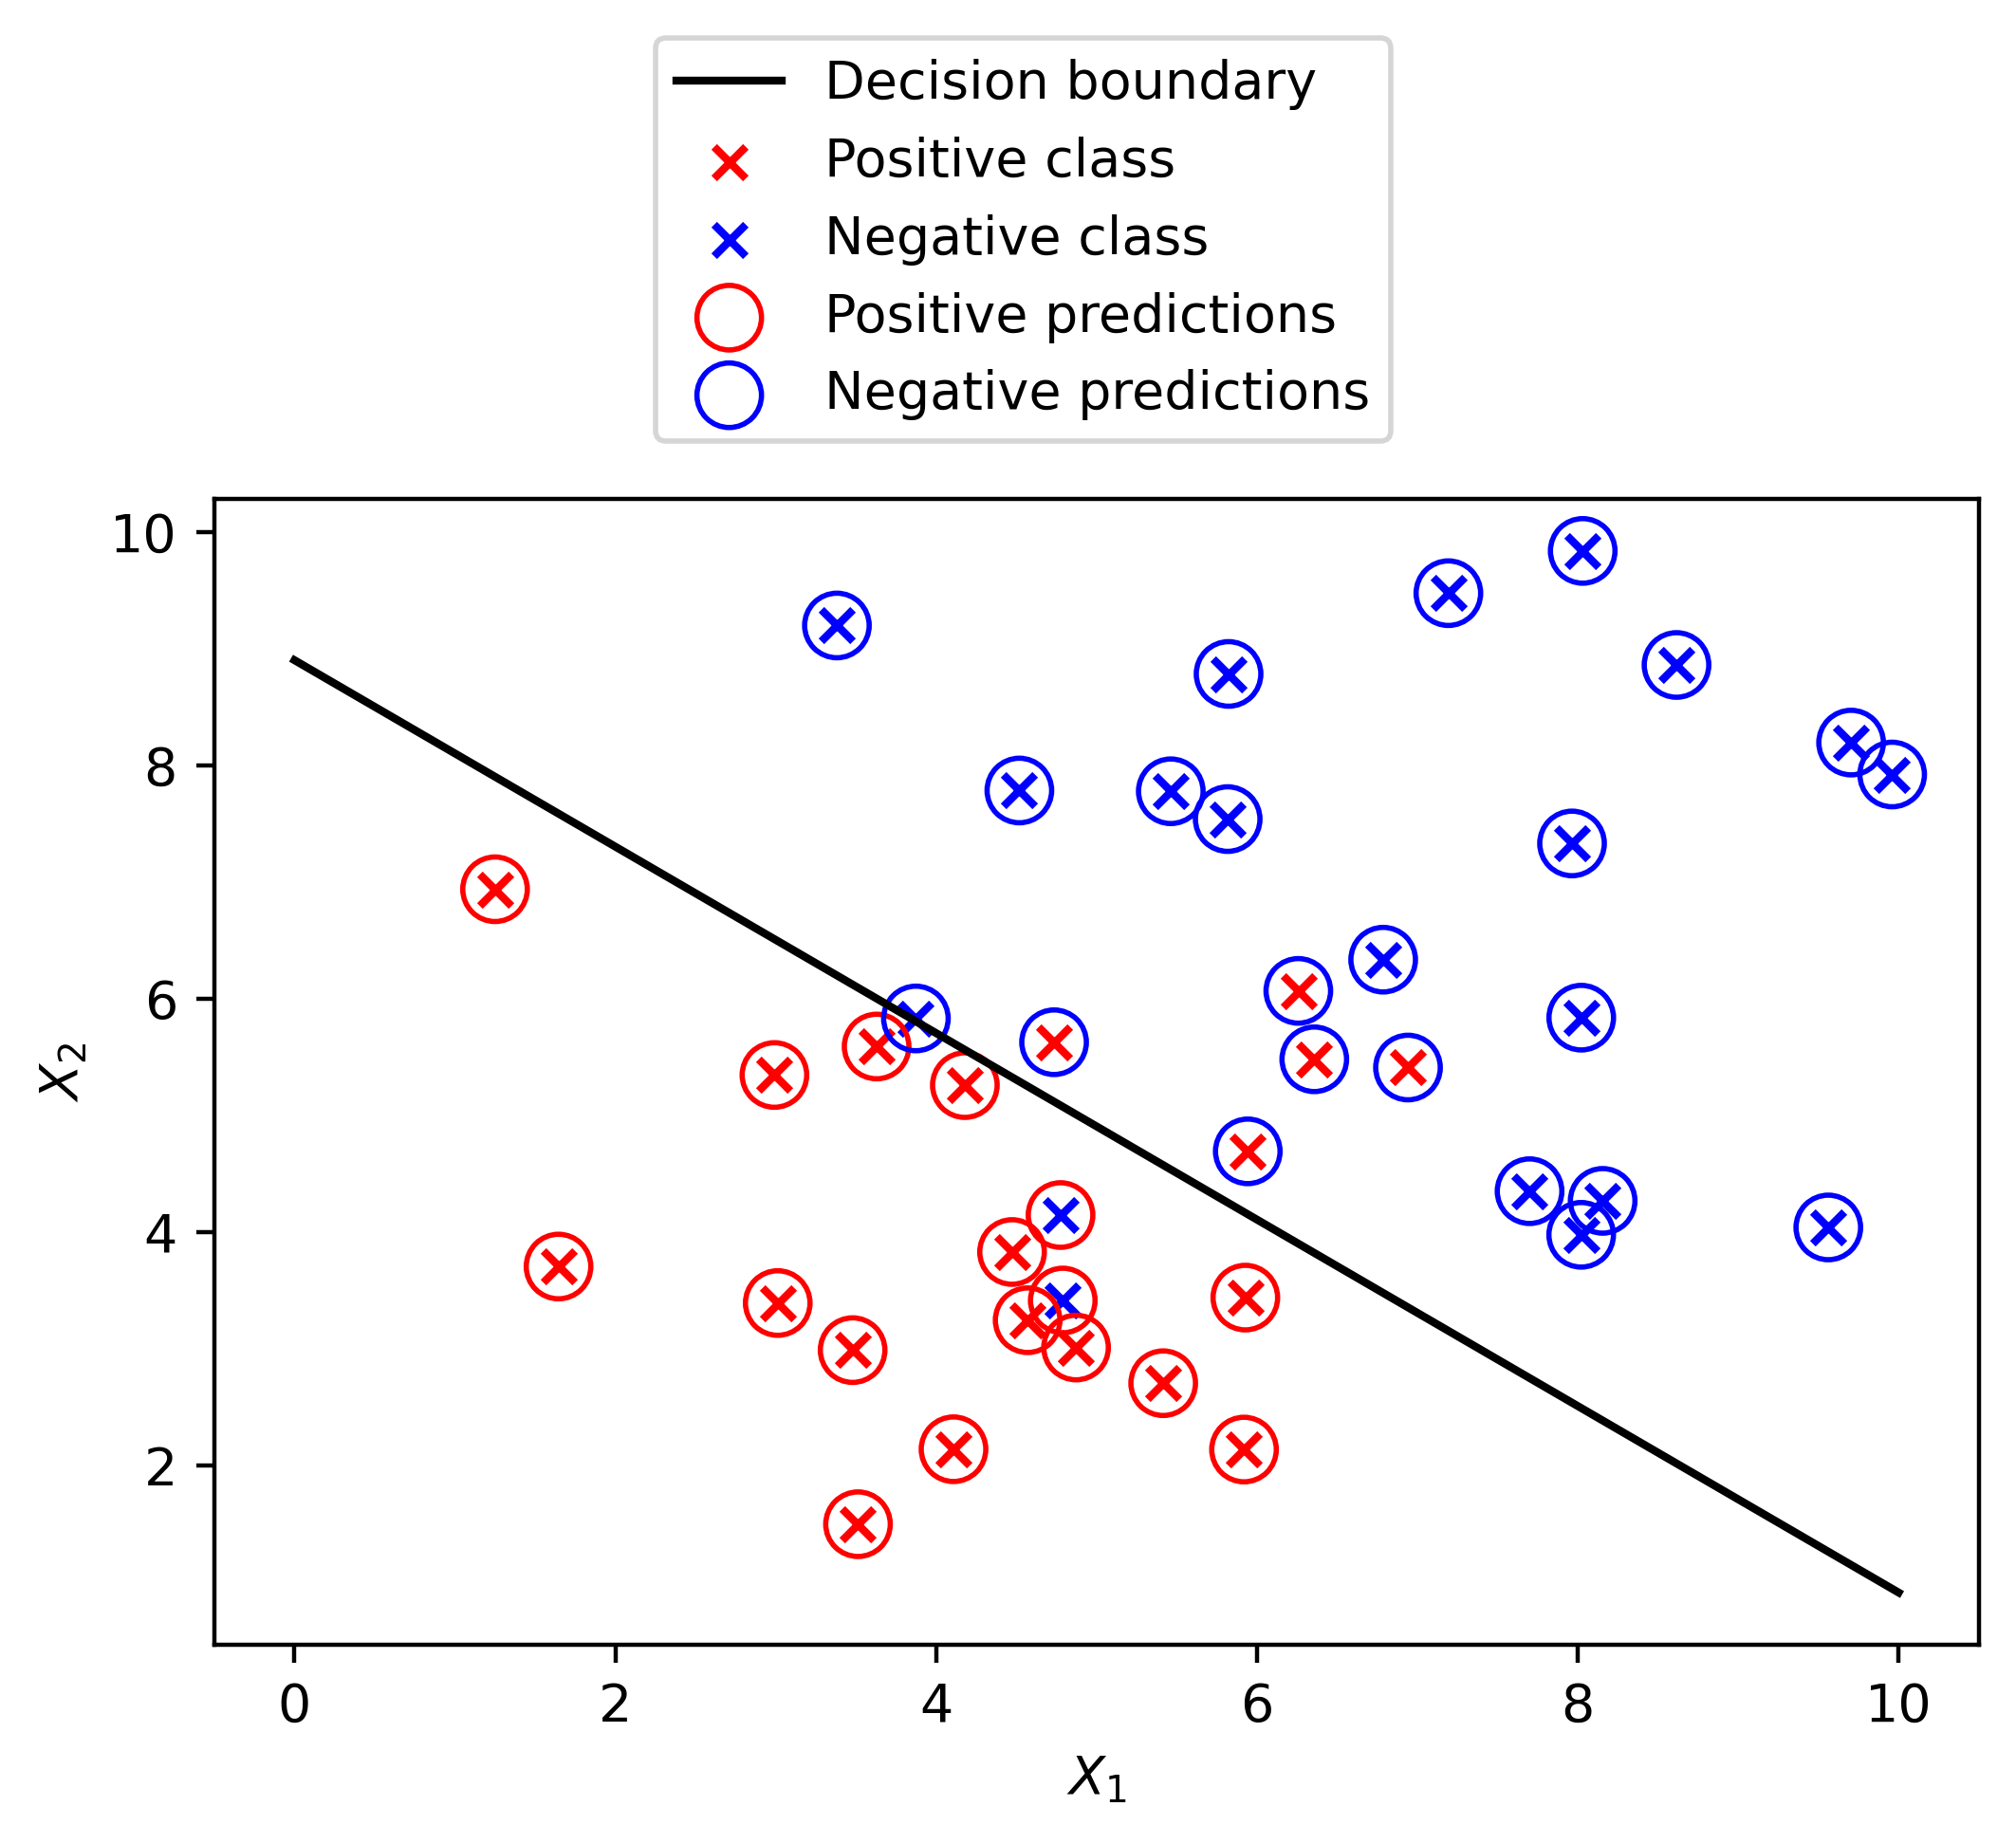

In [48]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])